# SandBox CLS-FR

Just a playground to test all the functions available now

In [3]:
from SCBert.load_data import DataLoader

cls = DataLoader().load_cls_fr()

In [2]:
from SCBert.SCBert import Vectorizer

vectorizer = Vectorizer("flaubert_small")

In [4]:
data = cls.review

In [5]:
print("In that model you have {} layers".format(vectorizer.nb_layer))

In that model you have 6 layers


In [6]:
text_vectors = vectorizer.vectorize(data, layers=[4,5], word_pooling_method="average", sentence_pooling_method="average")

100%|█████████▉| 99.59999999999984/100 [07:10<00:01,  4.32s/it] 


Explore the data to find groups that make sense with our vector computer in the last step. 

In [22]:
from SCBert.SCBert import EmbeddingExplorer

ee = EmbeddingExplorer(data,text_vectors)

In [23]:
%%time
labels = ee.cluster(3, cluster_algo="quick_k-means")

CPU times: user 237 ms, sys: 3.76 ms, total: 241 ms
Wall time: 66.9 ms


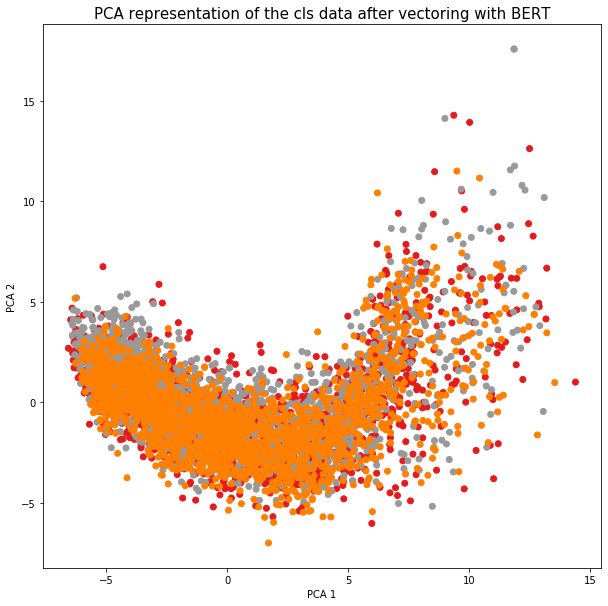

Proportion of cluster 0 : 0.288
Proportion of cluster 1 : 0.402
Proportion of cluster 2 : 0.31


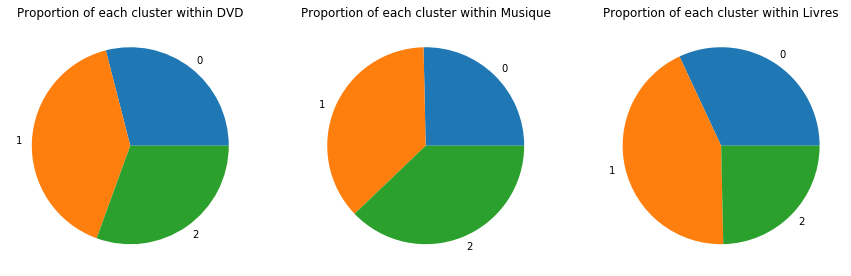

CPU times: user 944 ms, sys: 17.6 ms, total: 961 ms
Wall time: 793 ms


In [24]:
%%time 
ee.explore_cls(cls.code, 'PCA')

In [17]:
%%time
ee.extract_keywords(num_top_words=15)

CPU times: user 3min 44s, sys: 0 ns, total: 3min 44s
Wall time: 3min 44s


{'Cluster 0': array(["n'y", 'mal', 'cerveau', 'scènes', 'point', 'idéal', 'restera',
        'service', 'film', 'nombreux', "l'histoire", 'vie', 'générique',
        'public', 'sensible'], dtype='<U10'),
 'Cluster 1': array(['retour', 'porté', 'toujours', 'grâce', 'pouvoir', 'jour',
        'propose', 'rejoindre', 'plutôt', 'subir', 'trahison', 'sent',
        'place', "l'aise", 'quitte'], dtype='<U9'),
 'Cluster 2': array(['film', 'talent', 'dialogues', 'scenario', 'drôle', 'toujours',
        'dommage', 'bonheur', "c'est", 'malgré', 'intéressant', 'regarder',
        'famille', 'monde', 'place'], dtype='<U11')}

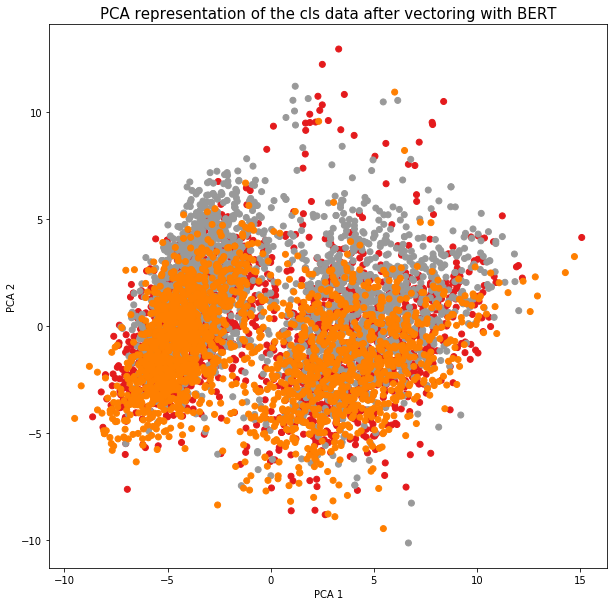

Proportion of cluster 0 : 0.525
Proportion of cluster 1 : 0.188
Proportion of cluster 2 : 0.288


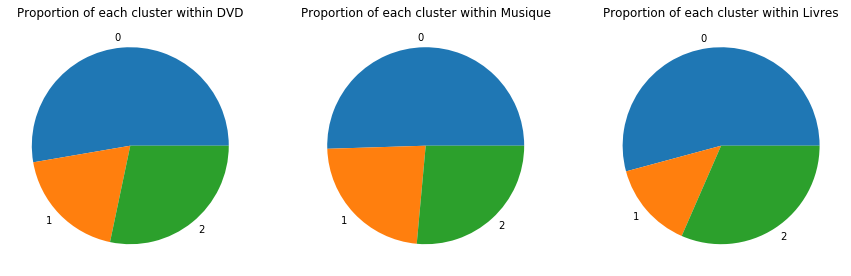

CPU times: user 6.31 s, sys: 524 ms, total: 6.83 s
Wall time: 7.14 s


In [19]:
%%time
vectorizer = Vectorizer("flaubert_base")
ee = EmbeddingExplorer(data, "text_vectors.pt")
labels = ee.cluster(3, cluster_algo="quick_k-means")
ee.explore_cls(cls.code, 'PCA')

In [20]:
%%time
ee.extract_keywords(num_top_words=15)

CPU times: user 3min 27s, sys: 51.5 ms, total: 3min 27s
Wall time: 3min 27s


{'Cluster 0': array(["n'y", 'mal', 'cerveau', 'scènes', 'point', 'idéal', 'soirée',
        'restera', 'panthéon', 'service', 'film', 'nombreux', "l'histoire",
        "l'enfance", 'vie'], dtype='<U10'),
 'Cluster 1': array(['vraiment', 'hauteur', 'meme', 'prix', 'souvent', 'cas', 'image',
        'belle', 'lignée', "l'humour", 'grand', 'original', 'films', 'vie',
        'prime'], dtype='<U8'),
 'Cluster 2': array(['retour', 'porté', 'toujours', 'grâce', 'pouvoir', 'jour',
        'propose', 'plutôt', 'subir', 'sent', 'place', "l'aise", 'quitte',
        'groupe', 'celle-ci'], dtype='<U8')}

In [21]:
ee.compute_coherence(vectorizer)

Cluster 0 with keywords : 
 ["n'y" 'mal' 'cerveau' 'scènes' 'point' 'idéal' 'soirée' 'restera'
 'panthéon' 'service' 'film' 'nombreux' "l'histoire" "l'enfance" 'vie'] 
 has a coherence of 0.2975486146978854 

Cluster 1 with keywords : 
 ['vraiment' 'hauteur' 'meme' 'prix' 'souvent' 'cas' 'image' 'belle'
 'lignée' "l'humour" 'grand' 'original' 'films' 'vie' 'prime'] 
 has a coherence of 0.3607958937972219 

Cluster 2 with keywords : 
 ['retour' 'porté' 'toujours' 'grâce' 'pouvoir' 'jour' 'propose' 'plutôt'
 'subir' 'sent' 'place' "l'aise" 'quitte' 'groupe' 'celle-ci'] 
 has a coherence of 0.2934638176894868 



[0.2975486146978854, 0.3607958937972219, 0.2934638176894868]